## 1 - Entendendo o Problema

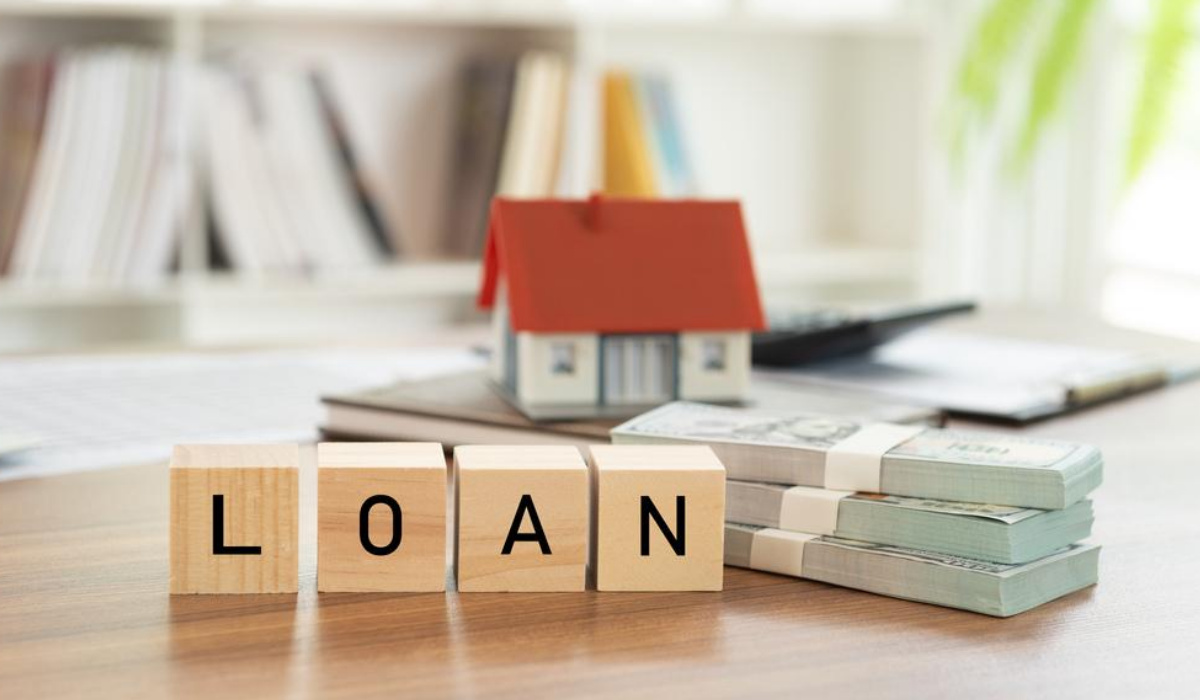

Prever a elegibilidade do empréstimo para a empresa Dream Housing Finance.
A empresa Dream Housing Finance lida com todos os tipos de empréstimos à habitação. Eles estão presentes em todas as áreas urbanas, semi-urbanas e rurais. O cliente solicita primeiro o empréstimo à habitação e depois essa empresa valida a elegibilidade do cliente para o empréstimo.

A empresa deseja automatizar o processo de elegibilidade do empréstimo (em tempo real) com base nos detalhes do cliente fornecidos durante o preenchimento do formulário de inscrição on-line. Esses detalhes são Gênero, Estado Civil, Educação, Número de Dependentes, Renda, Valor do Empréstimo, Histórico de Crédito e outros. Para automatizar esse processo, eles forneceram um conjunto de dados para identificar os segmentos de clientes qualificados para o valor do empréstimo, para que possam segmentar especificamente esses clientes.

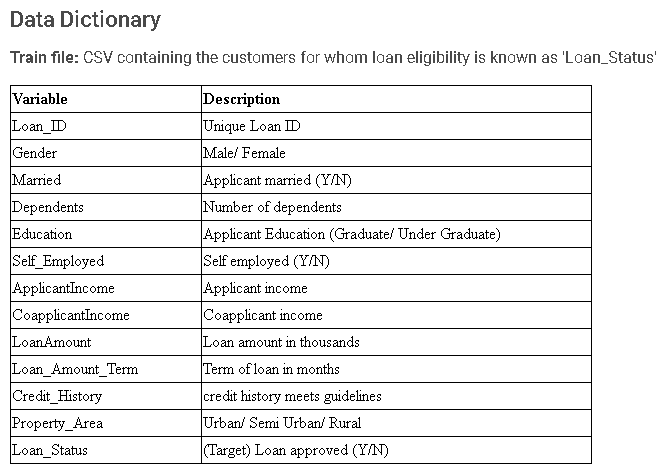

### Algumas Hipóteses

#### 1 - O rendimento do pretendente ao emprestimo e seu co aplicante influênciam no pagamento do emprestmo;
#### 2 - O número de Parcelas Influência no pagamento do emprestimo;
#### 3 - O montante solicitado Influência no pagamento do emprestimo;
#### 4 - Verificar se alguma outra variável pode gerar um viés no pagamento do emprestimo.

## 2 - Importando os Dados 

In [156]:
# Libraries 
import pandas as pd
import numpy as np
import seaborn as sns

#### Note: As per the challange the training and test has already been split so this process wasn't necessary.

In [256]:
data = pd.read_csv("dataset.csv")

In [196]:
data.shape

(614, 13)

In [164]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## 3 - Entendendo a Base de Dados (Basic EDA)

#### Verificando a tabela

In [159]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Descritivo dos dados

In [645]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Informações dos Dados

In [646]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Existem valores nulos na base

In [647]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

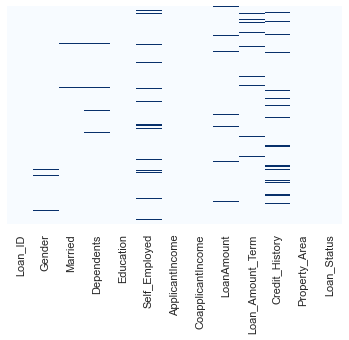

In [648]:
# Contar os nulos
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="Blues")

#### Removendo colunas que não são necessárias

In [257]:
data = data.drop(columns = ["Loan_ID"])

In [161]:
data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


## 4 - Compreendendo melhor os Dados (Deep EDA with Graphics)

In [165]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns 

#### 4.1 - Histogram

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

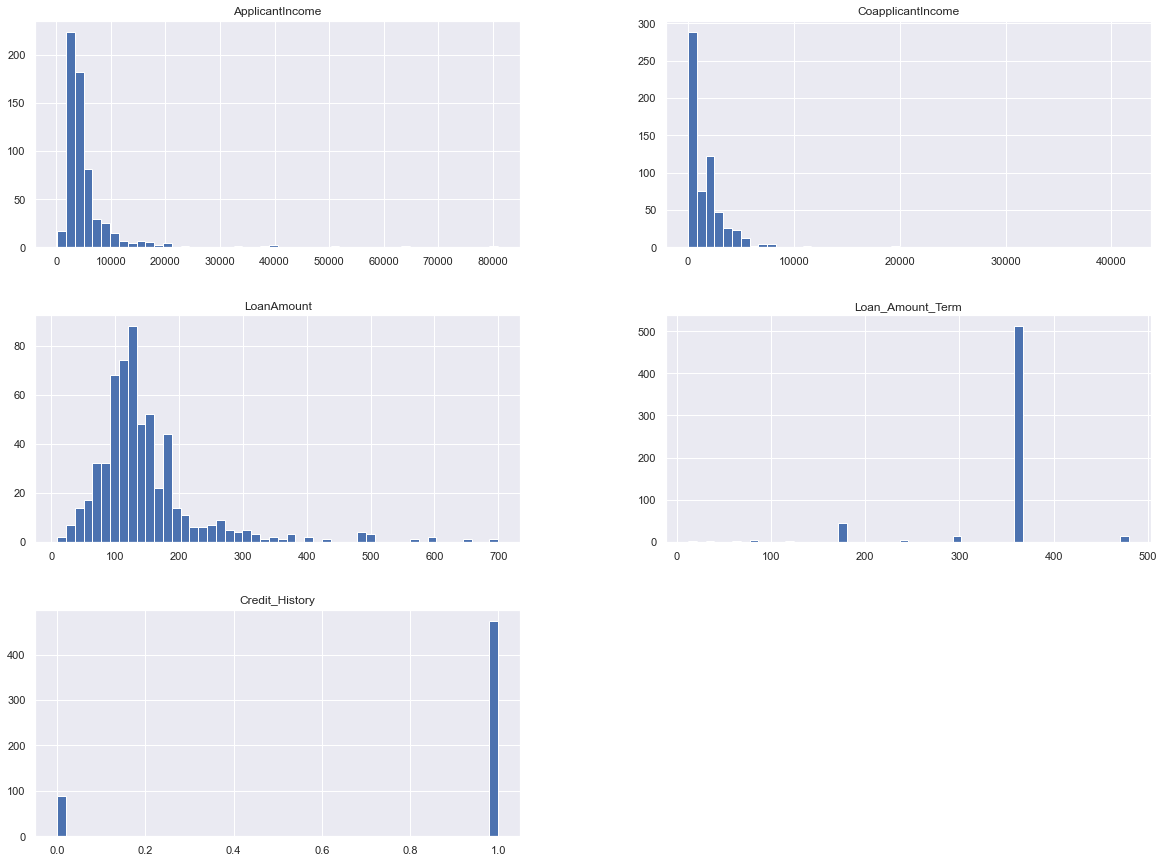

In [166]:
data.hist(bins=50 , figsize=(20,15))

#### Verificando os Outliers

<AxesSubplot:>

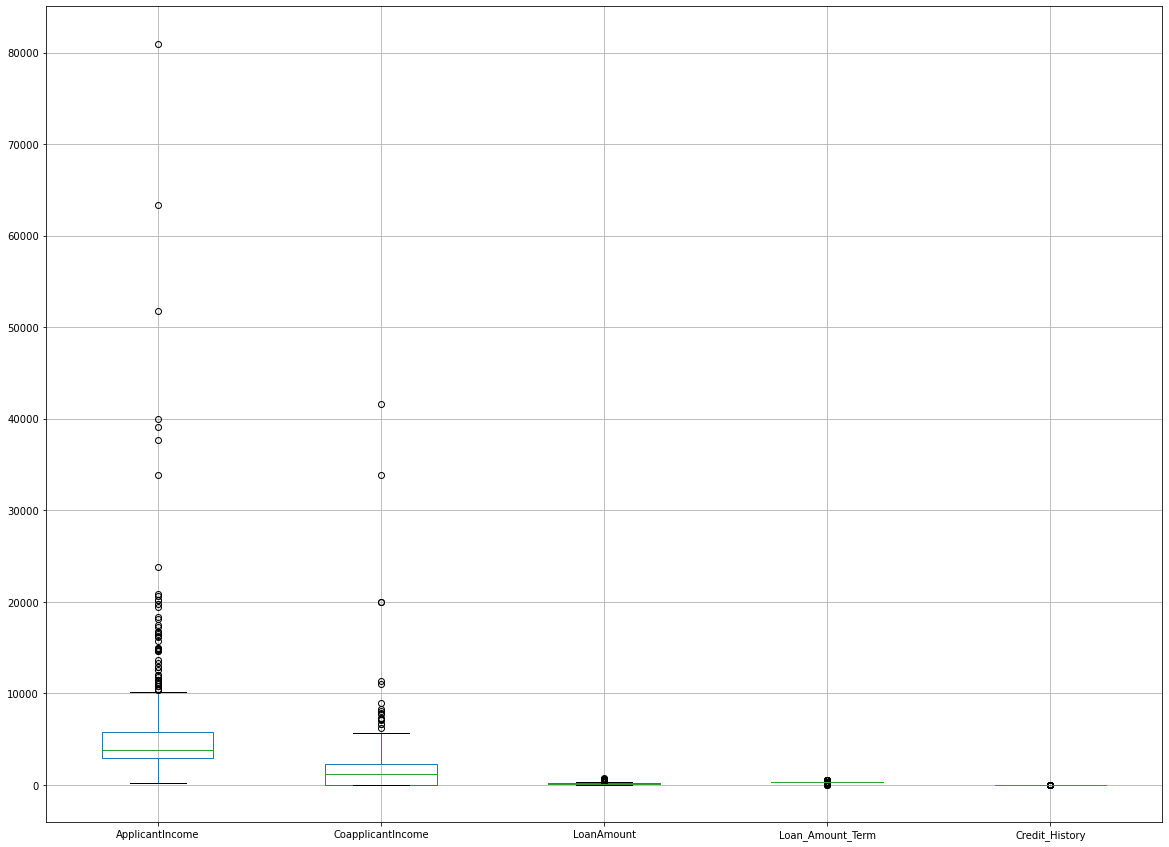

In [13]:
data.boxplot(figsize=(20,15))

Note: As variáveis applicantincome e coapplicant income possuem outliers que vamos tratar em seguida. Alguns algorítimos não são sensíveis a outliers mas como vamos testar alguns outros, será importante o tratamento.

#### Correlação

In [14]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

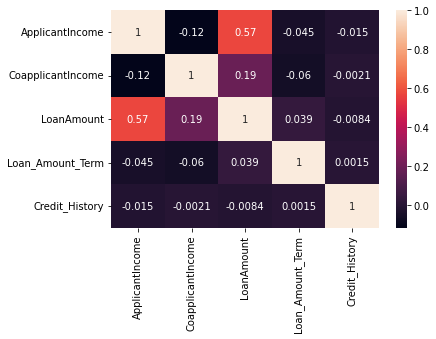

In [15]:
sns.heatmap(data.corr() , annot=True)

#### Intuições sobre os Dados Numéricos: Alguns dados não seguem um padrão de normalidade e é possível verificar outliers. Estes outliers devem ser provenientes de pessoas com grau de escolaridade maior e que possuem salários acima da média. 
####                               Atributos com Maior Correlação: LoanAmount , ApplicantIncome, CoapplicantIncome

### Vamos analisar os dados correlacionados com as variável target.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

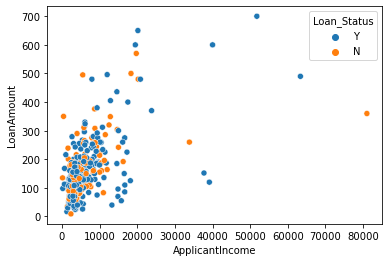

In [16]:
sns.scatterplot(data=data, x = "ApplicantIncome", y = "LoanAmount", hue="Loan_Status")

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>

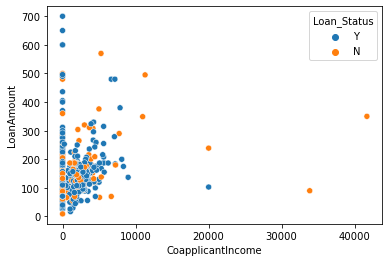

In [17]:
sns.scatterplot(data=data, x = "CoapplicantIncome", y = "LoanAmount", hue="Loan_Status")

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>

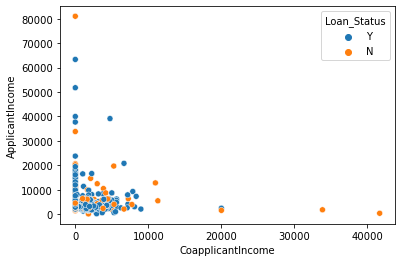

In [18]:
sns.scatterplot(data=data, x = "CoapplicantIncome", y = "ApplicantIncome", hue="Loan_Status")

### 4.3 -  Analysing Categorical Values

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

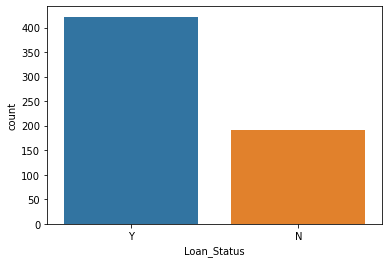

In [20]:
# Target Variable
sns.countplot(x='Loan_Status', data=data)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

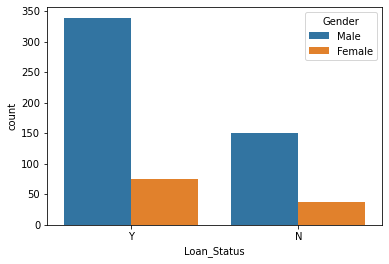

In [21]:
sns.countplot(x='Loan_Status', hue="Gender", data=data)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

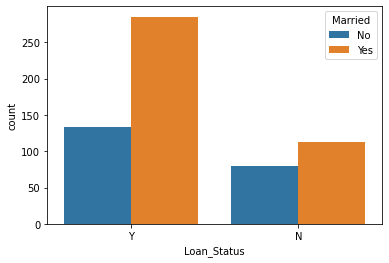

In [22]:
sns.countplot(x='Loan_Status', hue="Married", data=data)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

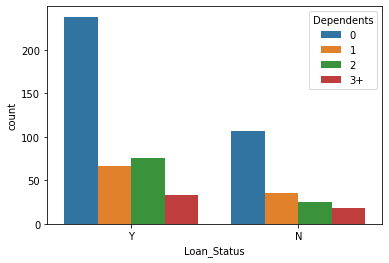

In [23]:
sns.countplot(x='Loan_Status', hue="Dependents", data=data)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

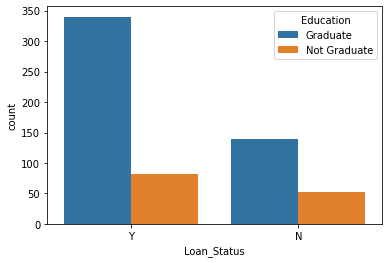

In [24]:
sns.countplot(x='Loan_Status', hue="Education", data=data)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

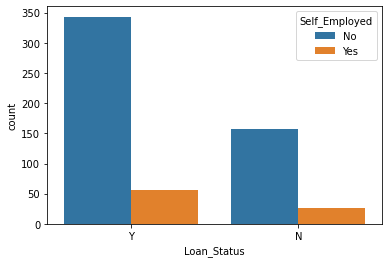

In [25]:
sns.countplot(x='Loan_Status', hue="Self_Employed", data=data)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

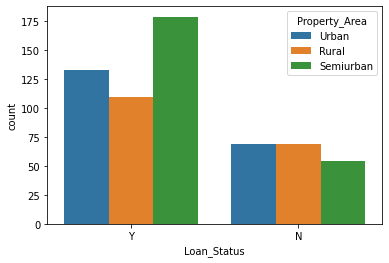

In [26]:
sns.countplot(x='Loan_Status', hue="Property_Area", data=data)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

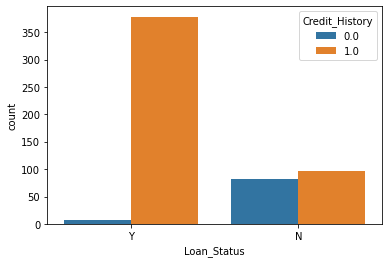

In [27]:
sns.countplot(x='Loan_Status', hue="Credit_History", data=data)

### -------------------------------------------Intuições sobre as Variáveis Categóricas----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
####  1 - As variáveis target possuem um desbalanceamento;
#### 2 - Não parece haver relação direta com o genero do aplicante;
#### 3 - O mesmo acontece com a maior parte das variáveis, exceto a variável sobre histórico que apresenta uma relação considerável sobre os aplicantes que serão potenciais bom pagadores.

### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Vamos remover os outliers das variáveis:  ApplicantIncome and CoapplicantIncome
     Technique IQR - Interquantil Rate
     Técnica FIQ - Faixa Interquartil

In [167]:
Q1 = np.percentile(data['ApplicantIncome'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['ApplicantIncome'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

In [168]:
# Upper bound
# Note: np.where returns the indexes of the True Results
upper = np.where(data['ApplicantIncome'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['ApplicantIncome'] <= (Q1-1.5*IQR))

In [169]:
# -> See the Outliers
c = 0
for i in upper:
    for n in i:
        c=c+1
    print(data['ApplicantIncome'][i])
    print('Total of Outliers ApplicantIncome:', c)    

9      12841
34     12500
54     11500
67     10750
102    13650
106    11417
115    14583
119    10408
126    23803
128    10513
130    20166
138    14999
144    11757
146    14866
155    39999
171    51763
183    33846
185    39147
191    12000
199    11000
254    16250
258    14683
271    11146
278    14583
284    20667
308    20233
324    15000
333    63337
369    19730
370    15759
409    81000
424    14880
432    12876
438    10416
443    37719
467    16692
475    16525
478    16667
483    10833
487    18333
493    17263
506    20833
509    13262
525    17500
533    11250
534    18165
561    19484
572    16666
594    16120
604    12000
Name: ApplicantIncome, dtype: int64
Total of Outliers ApplicantIncome: 50


#### Vamos analisar a variável ApplicantIncome com outliers e perceber os valores de Target

In [172]:
aplicant_outlier = data[data['ApplicantIncome'] > 10416]

In [174]:
aplicant_outlier.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
34,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N


In [175]:
aplicant_outlier['Loan_Status'].value_counts()

Y    32
N    16
Name: Loan_Status, dtype: int64

#### Para os valores com outliers temos que o dobro recebeu sim como resposta do banco.

In [9]:
# -> Substituir os outliers com nan
for j in upper:
    data['ApplicantIncome'][i] = np.nan

C:\Users\Diego Leal\AppData\Local\Temp\ipykernel_3312\3485871210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ApplicantIncome'][i] = np.nan


In [176]:
Q1 = np.percentile(data['CoapplicantIncome'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['CoapplicantIncome'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

In [177]:
# Upper bound
# Note: np.where returns the indexes of the True Results
upper = np.where(data['CoapplicantIncome'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['CoapplicantIncome'] <= (Q1-1.5*IQR))

In [178]:
# -> Ver os outliers
c = 0
for i in upper:
    for n in i:
        c=c+1
    print(data['CoapplicantIncome'][i])
    print('Total of Outliers CoapplicantIncome:', c) 

9      10968.0
12      8106.0
38      7210.0
122     8980.0
135     7750.0
177    11300.0
180     7250.0
253     7101.0
349     6250.0
372     7873.0
402    20000.0
417    20000.0
444     8333.0
506     6667.0
513     6666.0
523     7166.0
581    33837.0
600    41667.0
Name: CoapplicantIncome, dtype: float64
Total of Outliers CoapplicantIncome: 18


#### Vamos analisar a variável CoapplicantIncome com outliers e perceber os valores de Target

In [179]:
Coaplicant_outlier = data[data['CoapplicantIncome'] > 6250]

In [181]:
Coaplicant_outlier.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
12,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
38,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban,Y


In [182]:
Coaplicant_outlier['Loan_Status'].value_counts()

Y    9
N    8
Name: Loan_Status, dtype: int64

In [13]:
# -> Substituir os outliers com nan
for j in upper:
    data['CoapplicantIncome'][i] = np.nan

C:\Users\Diego Leal\AppData\Local\Temp\ipykernel_3312\1591320166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CoapplicantIncome'][i] = np.nan


In [14]:
# O número de nulls aumentou agora que removemos os outliers
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome      50
CoapplicantIncome    18
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

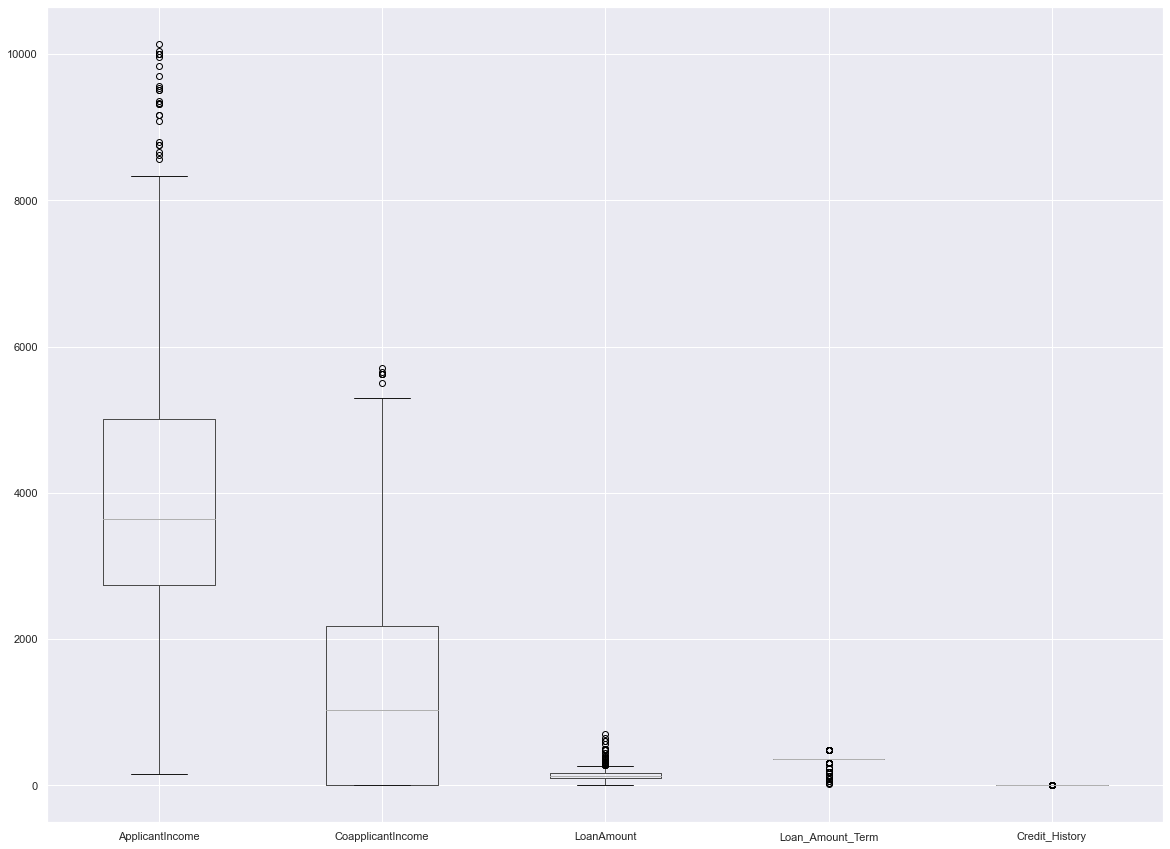

In [390]:
data.boxplot(figsize=(20,15))

### 5 - Pré Processamento dos Dados

#### Separando os nomes das colunas em variáveis especificas

In [258]:
colunas = data.columns

In [259]:
colunas

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Preenchendo os valores nulos com a media

In [260]:
# Vamos usar o simple imputer para esta tarefa
from sklearn.impute import SimpleImputer

In [261]:
imp = SimpleImputer(strategy='most_frequent')

In [262]:
imp_data = imp.fit(data)
data = imp_data.transform(data)

#### Re-transformar em Data Frame

In [263]:
data = pd.DataFrame(data, columns=colunas)

In [264]:
data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             614 non-null    object
 1   Married            614 non-null    object
 2   Dependents         614 non-null    object
 3   Education          614 non-null    object
 4   Self_Employed      614 non-null    object
 5   ApplicantIncome    614 non-null    object
 6   CoapplicantIncome  614 non-null    object
 7   LoanAmount         614 non-null    object
 8   Loan_Amount_Term   614 non-null    object
 9   Credit_History     614 non-null    object
 10  Property_Area      614 non-null    object
 11  Loan_Status        614 non-null    object
dtypes: object(12)
memory usage: 57.7+ KB


#### Get Dummies - One Hot Encoding

In [266]:
data = pd.get_dummies(data, drop_first=True, columns=['Gender', 'Married' , 'Education' , 'Self_Employed', 'Loan_Status'])

#### Label Enconding - Dependents, Property_Area

In [267]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [268]:
data['Dependents'] = le.fit_transform(data['Dependents'])

In [269]:
data['Property_Area'] = le.fit_transform(data['Property_Area'])

#### Vamos criar novas métricas baseadas no total de Rendimentos e no Valor da Mensalidade Paga

In [270]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [271]:
data['Monthly_Payment'] = (data['LoanAmount']/ data['Loan_Amount_Term']) * 1000

#### Vamos Criar um Atributo Rate que é a divisão Total de Rendimentos e Parcelas Mensais

In [272]:
data['Rate'] = data['Monthly_Payment'] / data['Total_Income']

#### Vamos Criar um Atributo Rate_Per_Dependent

In [273]:
data['Rate_Per_Dependent'] = data['ApplicantIncome'].div(data['Dependents'].where(data['Dependents'] != 0, np.nan))

In [274]:
data['Rate_Per_Dependent'] = data['Rate_Per_Dependent'].fillna(data['ApplicantIncome'])

#### Vamos Criar um Atributo Income_Rate = Applicantincome / CoapplicantIncome

In [275]:
data['Income_Rate'] = data['ApplicantIncome'].div(data['CoapplicantIncome'].where(data['CoapplicantIncome'] != 0, np.nan))

In [276]:
data['Income_Rate'] = data['Income_Rate'].fillna(0)

#### Normalização dos Dados

In [278]:
# Apply Feature Scaling - Omitir essa parte pois temos agora apenas 1 variável numérica
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()

In [279]:
transformer.fit(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term', 'Total_Income', 'Monthly_Payment', 'Rate', 'Rate_Per_Dependent', 'Income_Rate']]) 

StandardScaler()

In [280]:
data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term', 'Total_Income', 'Monthly_Payment', 'Rate', 'Rate_Per_Dependent', 'Income_Rate']] = transformer.transform(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term', 'Total_Income', 'Monthly_Payment', 'Rate', 'Rate_Per_Dependent', 'Income_Rate']])

In [281]:
data

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y,Total_Income,Monthly_Payment,Rate,Rate_Per_Dependent,Income_Rate
0,0,0.072991,-0.554487,-0.302759,0.273231,1.0,2,1,0,0,0,1,-0.182184,-0.273023,-0.256282,0.276740,-0.191451
1,1,-0.134412,-0.038732,-0.207648,0.273231,1.0,0,1,1,0,0,0,-0.144684,-0.229520,-0.238735,0.012510,0.207960
2,0,-0.393747,-0.554487,-0.944757,0.273231,1.0,2,1,1,0,1,1,-0.623656,-0.566665,-0.204035,-0.317882,-0.191451
3,0,-0.462062,0.251980,-0.302759,0.273231,1.0,2,1,1,1,0,1,-0.322885,-0.273023,-0.123512,-0.404915,-0.047488
4,0,0.097728,-0.554487,-0.053093,0.273231,1.0,2,1,0,0,0,1,-0.158785,-0.158829,-0.151212,0.308255,-0.191451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,-0.410130,-0.554487,-0.885313,0.273231,1.0,0,0,0,0,0,1,-0.639152,-0.539476,-0.116604,-0.338753,-0.191451
610,3,-0.212557,-0.554487,-1.253868,-2.522836,1.0,0,1,1,0,0,1,-0.452274,-0.490536,-0.292647,-0.658362,-0.191451
611,1,0.437174,-0.472404,1.278459,0.273231,1.0,2,1,1,0,0,1,0.199475,0.450207,0.093108,0.740708,4.228750
612,2,0.357064,-0.554487,0.493794,0.273231,1.0,2,1,1,0,0,1,0.086512,0.091311,-0.110347,-0.152686,-0.191451


## Dividir os Dados de Treino e Teste

In [282]:
from sklearn.model_selection import train_test_split

In [283]:
X = data.drop(columns=['Loan_Status_Y'])

In [284]:
y = data['Loan_Status_Y']

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Separando os nomes das colunas em variáveis a parte

In [289]:
indepedentes = X_train.columns

In [293]:
dependente = y_train.name

In [296]:
print("Nomes das Variáveis independentes: ", indepedentes)
print("Nomes da Variável Dependente: ", dependente)

Nomes das Variáveis independentes:  Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Gender_Male',
       'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Total_Income', 'Monthly_Payment', 'Rate', 'Rate_Per_Dependent',
       'Income_Rate'],
      dtype='object')
Nomes da Variável Dependente:  Loan_Status_Y


#### Vamos ver como ficou a nova estrutura dos dados com os atributos criados

In [297]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 90 to 559
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Dependents              491 non-null    int32  
 1   ApplicantIncome         491 non-null    float64
 2   CoapplicantIncome       491 non-null    float64
 3   LoanAmount              491 non-null    float64
 4   Loan_Amount_Term        491 non-null    float64
 5   Credit_History          491 non-null    object 
 6   Property_Area           491 non-null    int32  
 7   Gender_Male             491 non-null    uint8  
 8   Married_Yes             491 non-null    uint8  
 9   Education_Not Graduate  491 non-null    uint8  
 10  Self_Employed_Yes       491 non-null    uint8  
 11  Total_Income            491 non-null    float64
 12  Monthly_Payment         491 non-null    float64
 13  Rate                    491 non-null    float64
 14  Rate_Per_Dependent      491 non-null    f

In [298]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 454 to 303
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Dependents              123 non-null    int32  
 1   ApplicantIncome         123 non-null    float64
 2   CoapplicantIncome       123 non-null    float64
 3   LoanAmount              123 non-null    float64
 4   Loan_Amount_Term        123 non-null    float64
 5   Credit_History          123 non-null    object 
 6   Property_Area           123 non-null    int32  
 7   Gender_Male             123 non-null    uint8  
 8   Married_Yes             123 non-null    uint8  
 9   Education_Not Graduate  123 non-null    uint8  
 10  Self_Employed_Yes       123 non-null    uint8  
 11  Total_Income            123 non-null    float64
 12  Monthly_Payment         123 non-null    float64
 13  Rate                    123 non-null    float64
 14  Rate_Per_Dependent      123 non-null    

#### Ravel on Target - Para tornar a variável target em array 1d

In [299]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

#### Técnica para Reamostragem

In [785]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='all')

In [786]:
X_smote, y_smote = tl.fit_resample(X_train, y_train)

### 6 - Modelos de Machine Learning

#### Bibliotecas para Machine Learning

In [300]:
# Bibliotecas para Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn import tree

#Métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

## Random Forest

In [787]:
rf = RandomForestClassifier()

In [788]:
rf.fit(X_smote, y_smote)

RandomForestClassifier()

#### Cross Validation

In [789]:
print("Validation Mean F1 Score: ",cross_val_score(rf, X_smote, y_smote, cv=5,scoring='f1').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf, X_smote, y_smote, cv=5,scoring='accuracy').mean())

Validation Mean F1 Score:  0.8995063968584773
Validation Mean Accuracy:  0.8456022408963584


#### Grid Searching

<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

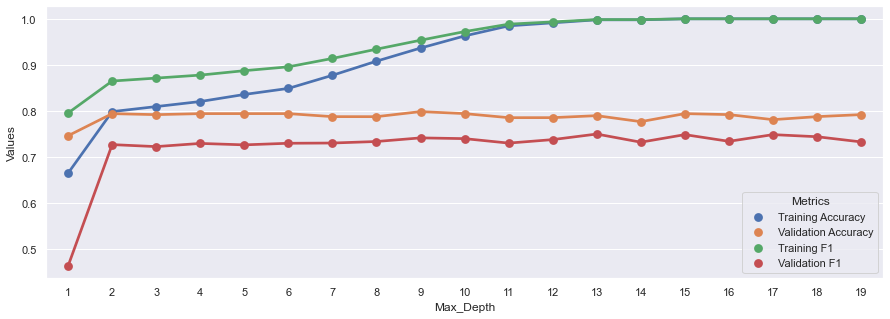

In [632]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    rf = RandomForestClassifier(max_depth=depth)
    rf.fit(X_smote, y_smote)
    y_training_pred = rf.predict(X_smote)

    training_acc = accuracy_score(y_smote, y_training_pred)
    train_f1 = f1_score(y_smote, y_training_pred)
    val_mean_f1 = cross_val_score(rf, X_smote, y_smote, cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(rf, X_smote, y_smote, cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

<AxesSubplot:xlabel='Min_Samples_leaf', ylabel='Values'>

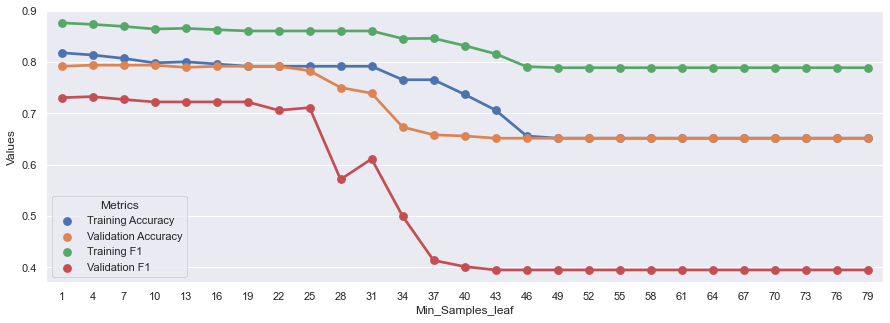

In [633]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []

import numpy as np

for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf 
    rf = RandomForestClassifier(max_depth=4,min_samples_leaf = samples_leaf)
    rf.fit(X_smote, y_smote)
    y_training_pred = rf.predict(X_smote)

    training_acc = accuracy_score(y_smote, y_training_pred)
    train_f1 = f1_score(y_smote, y_training_pred)
    val_mean_f1 = cross_val_score(rf, X_smote, y_smote, cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(rf, X_smote, y_smote, cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [634]:
rf = RandomForestClassifier(max_depth=4,min_samples_leaf = 4)
rf.fit(X_smote, y_smote)

RandomForestClassifier(max_depth=4, min_samples_leaf=4)

In [833]:
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [1,2,3,4,5],
              'min_samples_leaf': [2,4,6,8],
              'n_estimators': [5,8,10,30,50,100,150],
              'min_impurity_decrease': [0.0,0.1,0.2,0.4,0.5],
              'max_features': [2,4,6,8,10,15]}

In [834]:
grid_search = GridSearchCV(rf, param_grid , scoring='f1', return_train_score=True)

In [835]:
grid_search.fit(X_smote, y_smote)

GridSearchCV(estimator=RandomForestClassifier(max_depth=4, max_features=16,
                                              min_samples_leaf=8,
                                              n_estimators=10),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [2, 4, 6, 8, 10, 15],
                         'min_impurity_decrease': [0.0, 0.1, 0.2, 0.4, 0.5],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'n_estimators': [5, 8, 10, 30, 50, 100, 150]},
             return_train_score=True, scoring='f1')

In [836]:
rf_calibrate = grid_search.best_params_
rf_calibrate

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 15,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'n_estimators': 10}

In [837]:
rf = RandomForestClassifier(max_depth=4,
 max_features=15,
 min_impurity_decrease=0.0,
 min_samples_leaf=6,
 n_estimators=10)

In [838]:
rf.fit(X_smote, y_smote)

RandomForestClassifier(max_depth=4, max_features=15, min_samples_leaf=6,
                       n_estimators=10)

#### Cross Validation with Tuned Model

In [839]:
print("Validation Mean F1 Score: ",cross_val_score(rf, X_smote, y_smote, cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf, X_smote, y_smote, cv=5,scoring='accuracy').mean())

Validation Mean F1 Score:  0.7922723372800192
Validation Mean Accuracy:  0.8503641456582633


#### Prediction

In [840]:
y_pred = rf.predict(X_test)

<AxesSubplot:>

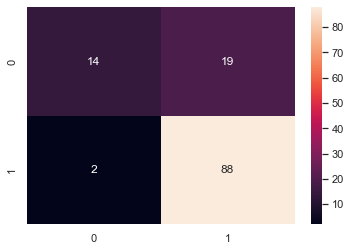

In [841]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [842]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [629]:
feature_imp = pd.Series(rf.feature_importances_, index=indepedentes).sort_values(ascending=False)

In [630]:
feature_imp

Credit_History            0.254030
Total_Income              0.102550
Rate                      0.094234
ApplicantIncome           0.089260
Rate_Per_Dependent        0.084204
LoanAmount                0.074940
Monthly_Payment           0.070887
Income_Rate               0.055947
CoapplicantIncome         0.047760
Property_Area             0.030786
Dependents                0.025335
Loan_Amount_Term          0.019664
Education_Not Graduate    0.014704
Married_Yes               0.014001
Self_Employed_Yes         0.011485
Gender_Male               0.010215
dtype: float64

<AxesSubplot:>

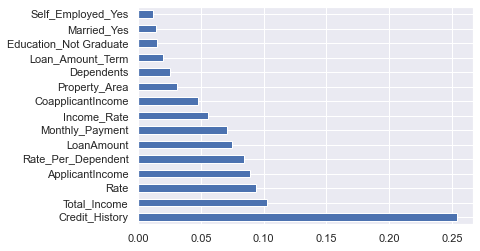

In [631]:
(pd.Series(rf.feature_importances_, index=indepedentes)
   .nlargest(15)
   .plot(kind='barh'))

#### Vizualizando os Estimadores

In [617]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=837250821),
 DecisionTreeClassifier(max_features='sqrt', random_state=1023909424),
 DecisionTreeClassifier(max_features='sqrt', random_state=1864925563),
 DecisionTreeClassifier(max_features='sqrt', random_state=1866051053),
 DecisionTreeClassifier(max_features='sqrt', random_state=345117354),
 DecisionTreeClassifier(max_features='sqrt', random_state=1416530182),
 DecisionTreeClassifier(max_features='sqrt', random_state=1668687951),
 DecisionTreeClassifier(max_features='sqrt', random_state=1581100187),
 DecisionTreeClassifier(max_features='sqrt', random_state=1445424670),
 DecisionTreeClassifier(max_features='sqrt', random_state=2067978035),
 DecisionTreeClassifier(max_features='sqrt', random_state=1228143377),
 DecisionTreeClassifier(max_features='sqrt', random_state=2037479581),
 DecisionTreeClassifier(max_features='sqrt', random_state=2058884655),
 DecisionTreeClassifier(max_features='sqrt', random_state=533951554),
 Decision

In [824]:
print(len(rf.estimators_))

10


#### Imprimindo uma árvore com um dos estimadores

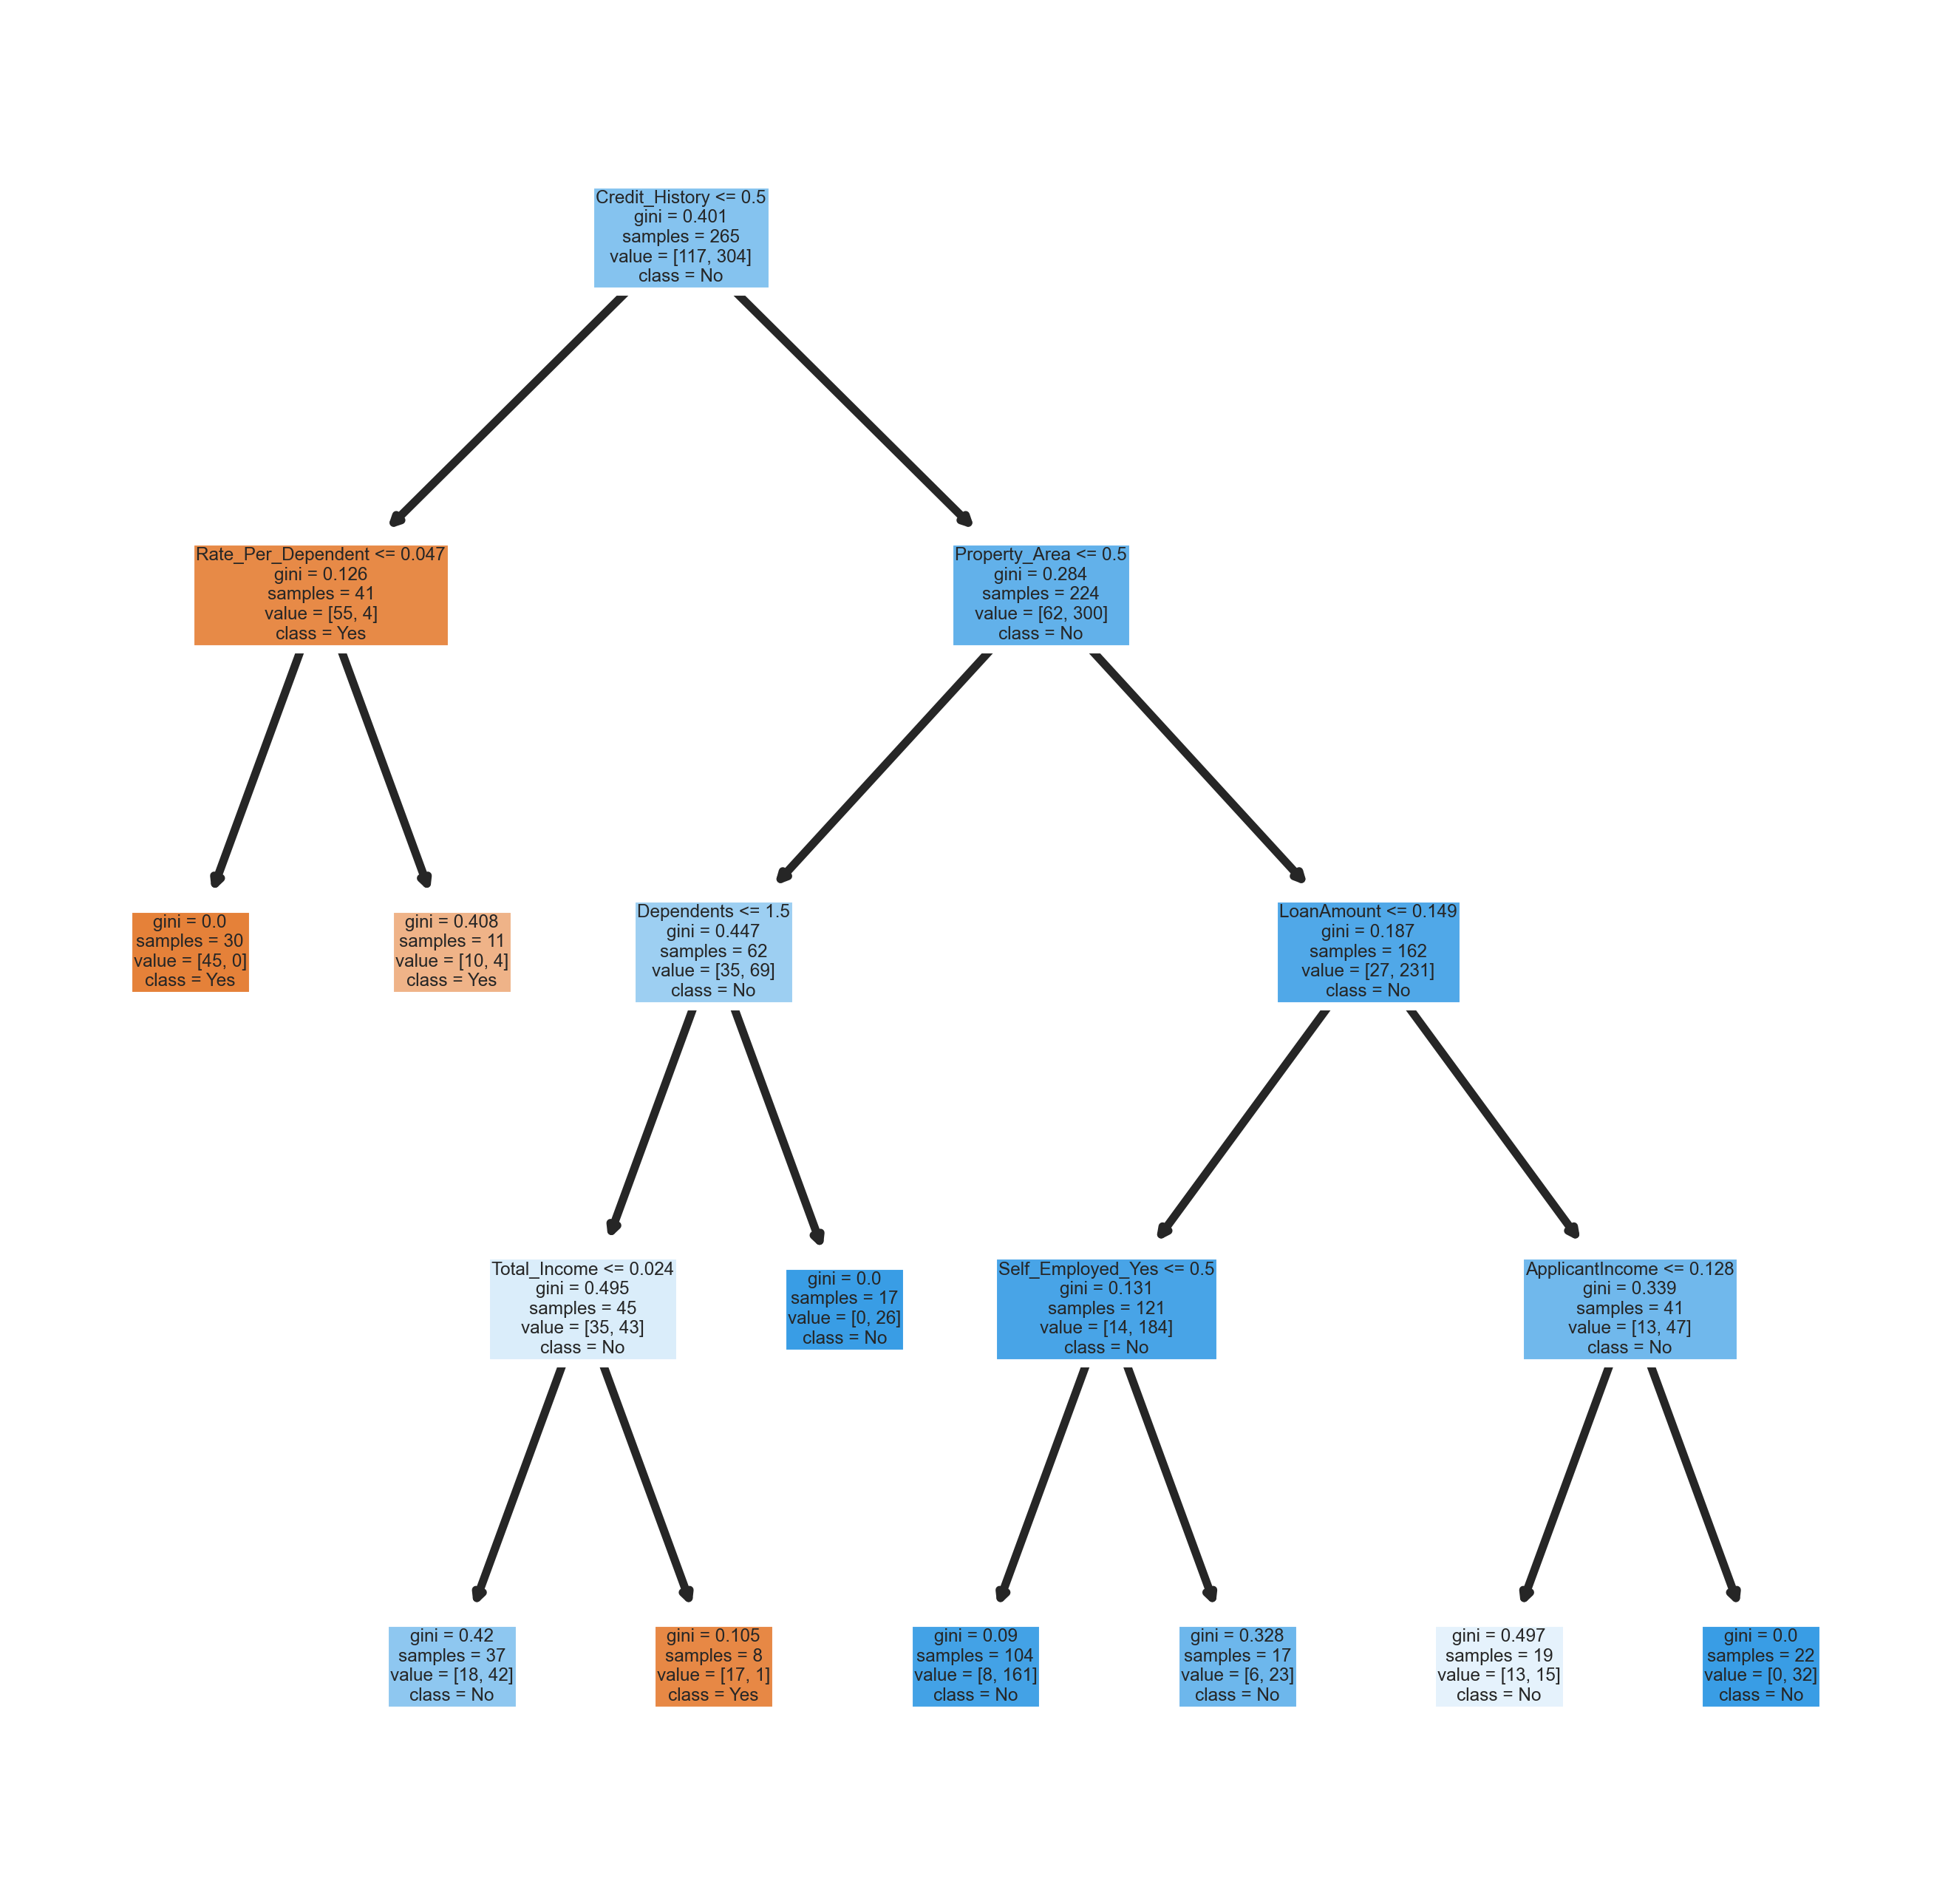

In [825]:
fn=X_train.columns
cn=["Yes", "No"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[1],
               feature_names = fn, 
               class_names=cn,
               filled = True);

## Decision Tree / Árvore de Decisão

In [681]:
dec_tree = DecisionTreeClassifier()

In [682]:
dec_tree.fit(X_smote, y_smote)

DecisionTreeClassifier()

#### Cross Validation

In [844]:
print("Validation Mean F1 Score: ",cross_val_score(dec_tree, X_train, y_train, cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(dec_tree, X_train, y_train, cv=5,scoring='accuracy').mean())

Validation Mean F1 Score:  0.6898350563249291
Validation Mean Accuracy:  0.7210472067614925


#### Grid Searching

In [686]:
param_grid = {'max_depth': [1,2,3,4,5],
              'min_samples_leaf': [2,4,6,8],
              'criterion': ["gini", "entropy", "log_loss"],
              'splitter' : ["best", "random"],
              'min_samples_split': [1,2,3,4,5,6],
              'max_features':[1,2,4,6,8,10,16]
             }

In [687]:
# Code Below
grid_search = GridSearchCV(dec_tree, param_grid , scoring='f1', return_train_score=True)

In [688]:
grid_search.fit(X_train, y_train)

C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4200 fits failed out of a total of 25200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    check_scalar(
  File "C:\Users\Diego Leal\anaconda3\lib\site-packages\sk

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [1, 2, 4, 6, 8, 10, 16],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='f1')

In [689]:
dec_tree_calibrate = grid_search.best_params_
dec_tree_calibrate

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'splitter': 'random'}

#### Modelo Calibrado

In [690]:
dec_tree = DecisionTreeClassifier(criterion='gini',
 max_depth=3,
 max_features=8,
 min_samples_leaf=4,
 min_samples_split=4,
 splitter='random')

In [691]:
dec_tree.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=3, max_features=8, min_samples_leaf=4,
                       min_samples_split=4, splitter='random')

#### Plot da Arvore de Decisão

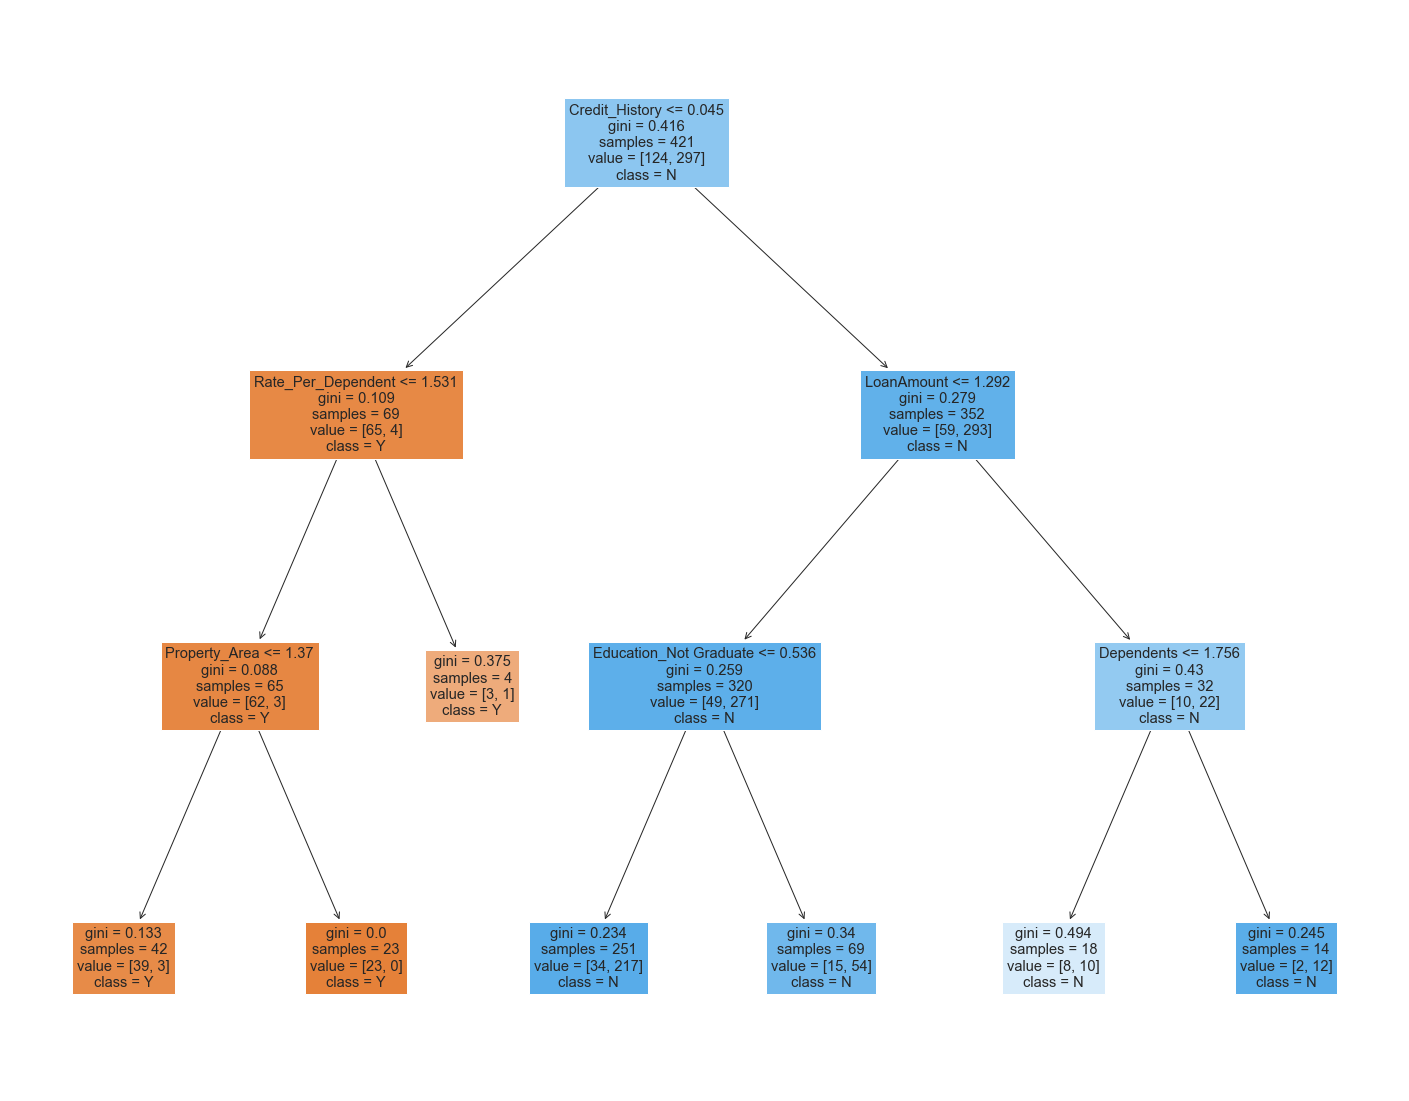

In [693]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dec_tree, 
                   feature_names=X_train.columns,  
                   class_names=["Y","N"],
                   filled=True)

#### Cross Validation com Modelo Calibrado

In [852]:
print("Validation Mean F1 Score: ",cross_val_score(dec_tree, X_train, y_train, cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(dec_tree, X_train, y_train, cv=5,scoring='accuracy').mean())

Validation Mean F1 Score:  0.6242348089394014
Validation Mean Accuracy:  0.7963306534735107


#### Previsão/Classificação

In [694]:
y_pred = dec_tree.predict(X_test)

<AxesSubplot:>

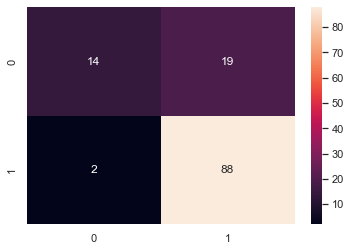

In [831]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [696]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



### Logistic Regression / Regressão Logistica

In [805]:
lg = LogisticRegression()

In [806]:
lg.fit(X_smote, y_smote)

LogisticRegression()

#### Cross Validation

In [807]:
print("Validation Mean F1 Score: ",cross_val_score(lg, X_smote, y_smote, cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(lg, X_smote, y_smote, cv=5,scoring='accuracy').mean())

Validation Mean F1 Score:  0.7845919358976812
Validation Mean Accuracy:  0.8479271708683473


#### Grid Searching

In [703]:
param_grid = {'C': [0.5, 1.0, 1.5, 2.0, 2.5],
              "penalty" : ['l2', 'l1', 'elasticnet'],
              "tol" : [0.0000, 0.0001, 0.0002],
              "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
             }

In [704]:
grid_search = GridSearchCV(lg, param_grid , scoring='f1', return_train_score=True)

In [705]:
grid_search.fit(X_smote, y_smote)

C:\Users\Diego Leal\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\Diego Leal\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Diego Leal\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\Diego Leal\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:4

C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Diego Leal\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\Diego Leal\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Diego Leal\anaconda3\lib\site-packages\scipy\optimize\_linesearch.

C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: Converge

C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklea

C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: Conver

C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
650 fits failed out of a total of 1125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686,

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1.0, 1.5, 2.0, 2.5],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0, 0.0001, 0.0002]},
             return_train_score=True, scoring='f1')

In [706]:
lg_calibrate = grid_search.best_params_
lg_calibrate

{'C': 1.0, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.0}

#### Teste de Limiar com Modelo Calibrado

C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: Con

<AxesSubplot:xlabel='Decision Threshold', ylabel='Values'>

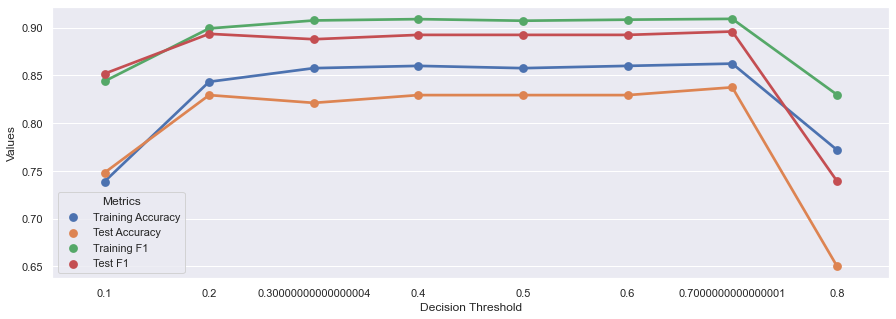

In [808]:
train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    lg = LogisticRegression(C=1.0, penalty = 'l1', solver='saga', tol= 0.0,)
    lg.fit(X_smote, y_smote)
    
    y_pred_train_thresh = lg.predict_proba(X_smote)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_smote, y_pred_train)
    train_f1 = f1_score(y_smote, y_pred_train)
    
    y_pred_test_thresh = lg.predict_proba(X_test)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int)
    
    test_acc = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    thresholds.append(thresh)
    
    test_accuracies.append(test_acc)
    test_f1_scores.append( test_f1)
    
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

#### Previsão / Classificação - Utilizando o limiar de decisão

In [809]:
thresh = 0.7 
y_pred_test_thresh = lg.predict_proba(X_test)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 

<AxesSubplot:>

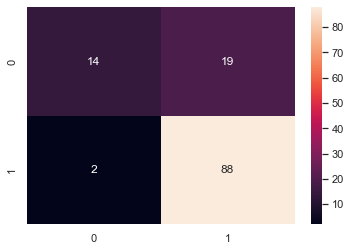

In [832]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [811]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.52      0.63        33
           1       0.84      0.96      0.90        90

    accuracy                           0.84       123
   macro avg       0.83      0.74      0.76       123
weighted avg       0.83      0.84      0.82       123



### ADA Boosting

In [844]:
from sklearn.ensemble import AdaBoostClassifier

In [845]:
ada = AdaBoostClassifier()

In [846]:
ada.fit(X_smote, y_smote)

AdaBoostClassifier()

#### Cross Validation

In [847]:
print("Validation Mean F1 Score: ",cross_val_score(ada, X_smote, y_smote, cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(ada, X_smote, y_smote, cv=5,scoring='accuracy').mean())

Validation Mean F1 Score:  0.7663466283912246
Validation Mean Accuracy:  0.8242296918767508


#### Grid Searching

In [848]:
param_grid = {'n_estimators': [15,25, 50, 75, 100],
              'learning_rate': [0.0, 0.5, 1.0, 1.5],
              'algorithm': ['SAMME', 'SAMME.R']}

In [849]:
grid_search = GridSearchCV(ada, param_grid , scoring='f1', return_train_score=True)

In [850]:
grid_search.fit(X_smote, y_smote)

C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 506, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\Diego Leal\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 123, in fit
    check_scalar(
  File "C:\Us

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0, 0.5, 1.0, 1.5],
                         'n_estimators': [15, 25, 50, 75, 100]},
             return_train_score=True, scoring='f1')

In [851]:
ada_calibrate = grid_search.best_params_
ada_calibrate

{'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 75}

#### Modelo Calibrado Cross Validation

In [852]:
ada = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, n_estimators=75)

In [853]:
ada.fit(X_smote, y_smote)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, n_estimators=75)

In [854]:
print("Validation Mean F1 Score: ",cross_val_score(ada, X_train, y_train, cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(ada, X_train, y_train, cv=5,scoring='accuracy').mean())

Validation Mean F1 Score:  0.7359377681095485
Validation Mean Accuracy:  0.80849309420738


#### Previsão/Classificação

<AxesSubplot:>

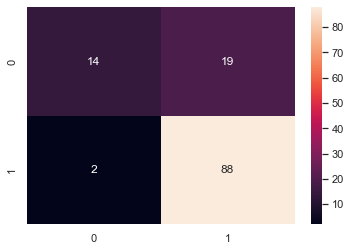

In [855]:
y_pred = ada.predict(X_test)
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [856]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



## 7 - Model Communication

### Resultados:



### Declarações Finais e Plano de Ação para Melhoria do Plano de Negócios

    1 - É importante considerar o histórico positivo de crédito do cliente;
    2 - Verifcar sempre qual o impacto do emprestimo no rendimento total do cliente (Aplicante e Co-Aplicante)
    3 - Considerar seu possível custo de vida mediante a avaliação de localização geográfica;
    4 - Para melhoria do modelo seria importante uma coleta de dados maior para uma melhor generalização;
    5 - Verificar as previsões incorretas e analisar pontos de desequilibrio em outras variáveis.
    6 - Coletar mais atributos dos clientes que possam ter influência no score de pagamento.
